# Assignment 3

# Text classification with tf*idf features

In [1]:
import sys
from os import pardir, getcwd
from os.path import join, abspath
PARENT_DIRECTORY = abspath(join(getcwd(), pardir))
sys.path.insert(0, PARENT_DIRECTORY)
print(sys.path)

import warnings
import sklearn.exceptions
from app.preprocessing import load_dataset, load_embeddings
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.callbacks import ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam
from keras import backend as K

data = load_dataset()
embeddings = load_embeddings(data, 'post', minimized=False)
# TODO: find better way to find the count of a categorical variables of a DataFrame
Classes = data['tags'].value_counts().index.to_list()
Nclasses = len(Classes)


['/home/giannhs/master_classes/text_analytics/text-classification-mlp', '/home/giannhs/master_classes/text_analytics/text-classification-mlp/notebooks', '/home/giannhs/miniconda3/envs/text_analytics/lib/python37.zip', '/home/giannhs/miniconda3/envs/text_analytics/lib/python3.7', '/home/giannhs/miniconda3/envs/text_analytics/lib/python3.7/lib-dynload', '', '/home/giannhs/miniconda3/envs/text_analytics/lib/python3.7/site-packages', '/home/giannhs/miniconda3/envs/text_analytics/lib/python3.7/site-packages/IPython/extensions', '/home/giannhs/.ipython']


Using TensorFlow backend.


## MLP classifier in Keras using tf*idf features

In [2]:
from app.preprocessing import preprocess_data, load_dataset
from app.metrics import precision, recall, f1, accuracy

model_data = preprocess_data(data, 'tags', 'post')
model = Sequential()
model.add(Dense(256, input_dim=model_data['x_train'].shape[1] , activation='relu'))
# Dropout probability in order to avoid overfitting.
model.add(Dropout(0.7))
model.add(Dense(126,  activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(Nclasses,  activation='sigmoid'))

print(model.summary())
#Model compilation parameterized with  
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=[precision, recall, f1, accuracy])

checkpoint = ModelCheckpoint('keras_tf_idf_model', monitor='val_f1', verbose=1, save_best_only=True, mode='max')

history = model.fit(model_data['x_train'], model_data['y_train'],
              batch_size=32,
              epochs=10,
              verbose = 0,
              callbacks=[checkpoint,TQDMNotebookCallback()],
              validation_data=(model_data['x_test'], model_data['y_test']),
              shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1280256   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 126)               32382     
_________________________________________________________________
dropout_2 (Dropout)          (None, 126)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                2540      
Total params: 1,315,178
Trainable params: 1,315,178
Non-trainable params: 0
___________


Epoch 00001: val_f1 improved from -inf to 0.58765, saving model to keras_tf_idf_model



Epoch 00002: val_f1 improved from 0.58765 to 0.76931, saving model to keras_tf_idf_model



Epoch 00003: val_f1 improved from 0.76931 to 0.80708, saving model to keras_tf_idf_model



Epoch 00004: val_f1 improved from 0.80708 to 0.82169, saving model to keras_tf_idf_model



Epoch 00005: val_f1 improved from 0.82169 to 0.82422, saving model to keras_tf_idf_model



Epoch 00006: val_f1 improved from 0.82422 to 0.82646, saving model to keras_tf_idf_model



Epoch 00007: val_f1 improved from 0.82646 to 0.82848, saving model to keras_tf_idf_model



Epoch 00008: val_f1 improved from 0.82848 to 0.82966, saving model to keras_tf_idf_model



Epoch 00009: val_f1 did not improve from 0.82966



Epoch 00010: val_f1 did not improve from 0.82966



 ### Notes of TF-IDF MLD Text Classification
 
 Based on the parameter tuning of the Model that is used for the text classification we hav

## Visualize Model Training History

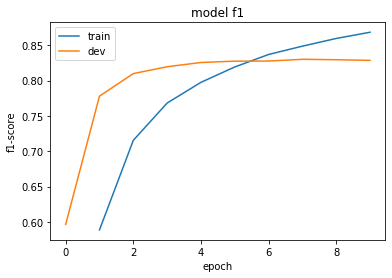

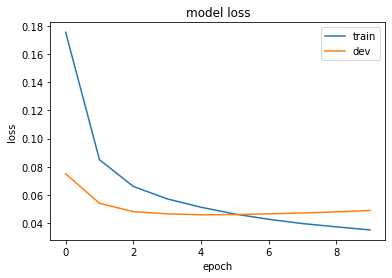

In [4]:
from app.visualization import plot_history_metrics
%matplotlib inline
plot_history_metrics(history_obj=history)

## Evaluate performance of tf-idf MLP model

In [5]:
score = model.evaluate(model_data['x_test'], model_data['y_test'], batch_size=32, verbose=1)

print('\nTest Binary_cross_entropy: %.4f' %  (score[0]))
print('\nTest precision: %.4f' %  (score[1]))
print('\nTest recall: %.4f' %  (score[2]))
print('\nTest f1: %.4f' % (score[3]))
print('\nTest accuracy: %.4f'% (score[4]))

12000/12000 [==============================] - 1s 66us/step

Test Binary_cross_entropy: 0.0490

Test precision: 0.8763

Test recall: 0.7872

Test f1: 0.8286

Test accuracy: 0.9838


## Visualize Prediction Perfomance of centroids MLP model

--------------------------------------------------------------------------------
Accuracy Score: 82.33%
--------------------------------------------------------------------------------
Confusion Matrix:

               predicted_sql  predicted_ruby-on-rails  predicted_android  \
sql                      423                        3                  0   
ruby-on-rails              3                      526                  1   
android                    0                        1                606   
angularjs                 46                        1                  0   
asp.net                    6                        1                  0   
c                         72                        3                  0   
c#                        13                        0                  0   
c++                        0                        1                  1   
css                        5                        1                  0   
html                       6        

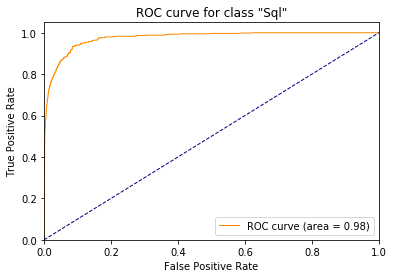

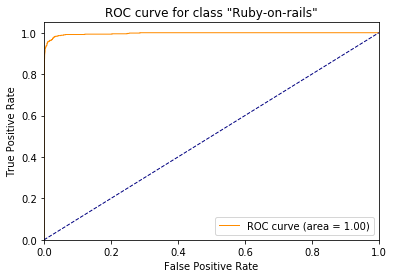

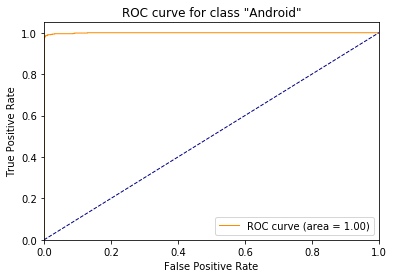

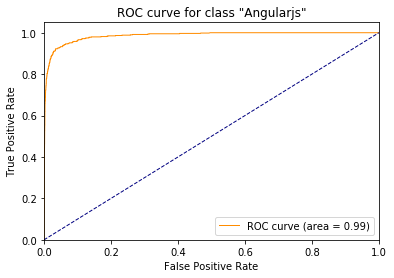

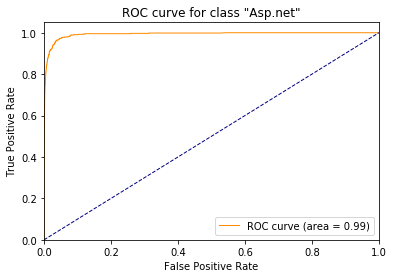

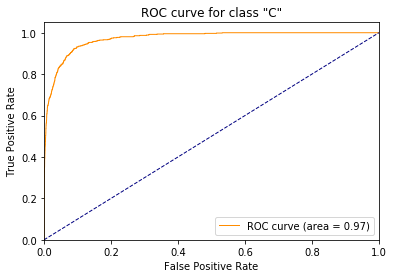

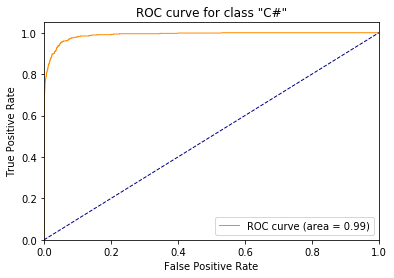

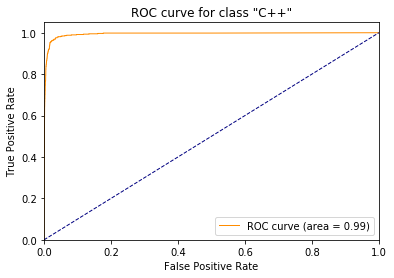

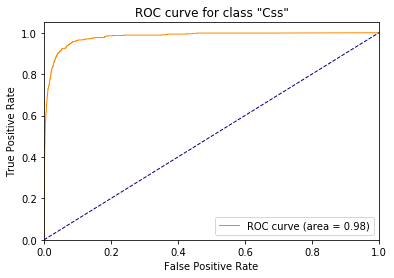

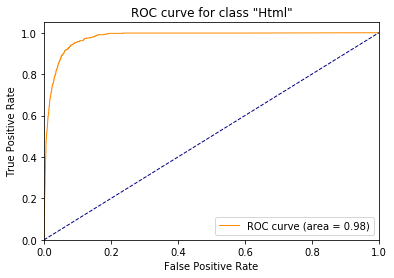

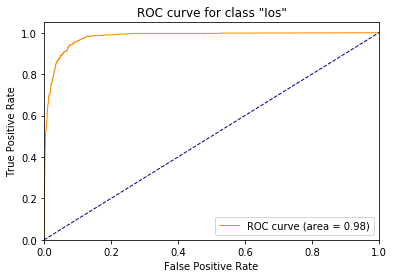

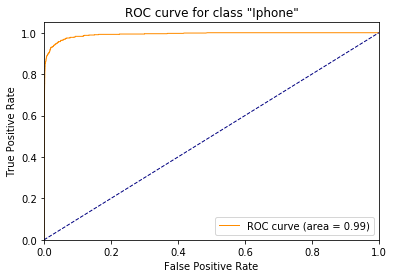

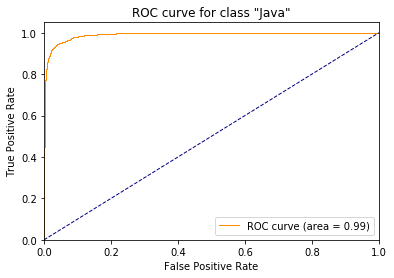

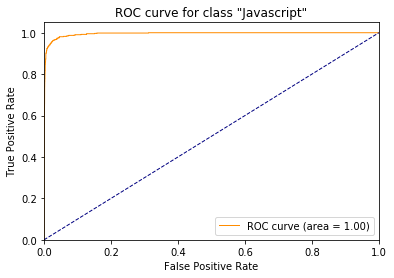

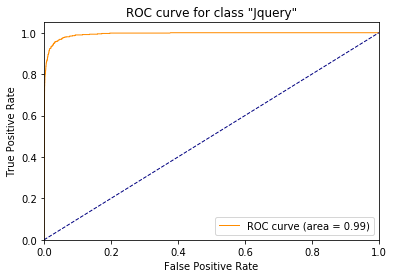

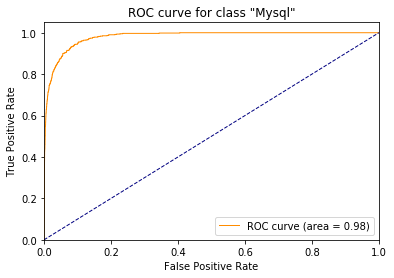

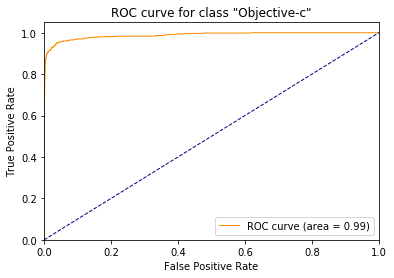

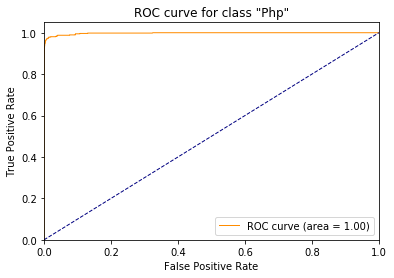

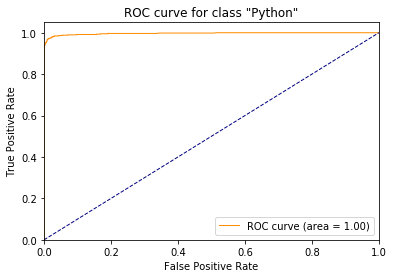

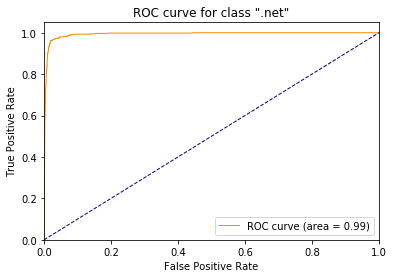

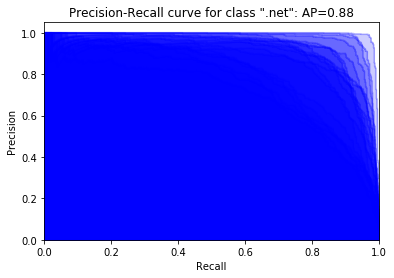

In [7]:
import numpy as np
from app.visualization import plot_prediction_metrics, create_clf_report, plot_roc_curve, plot_precision_recall_curve
import matplotlib.pylab as plt

prediction_val = model.predict(model_data['x_test'], batch_size=32)

# returns each entry result to the classification with the relevant probabilities
y_pred_processed = np.array([np.argmax(val) for val in prediction_val])
y_true_processed = np.array([np.argmax(val) for val in model_data['y_test']])

create_clf_report(y_true_processed, y_pred_processed, Classes)

plot_roc_curve(model_data['y_test'], prediction_val, Classes, 1)

plot_precision_recall_curve(model_data['y_test'], prediction_val, Classes , 1)


# Text classification with embedding centroids

## MLP text classifier in Keras with fasttext centroids

In [ ]:
### If 'cc.en.300.bin.gz' is not downloaded then comment out the below lines
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
# !gzip -d cc.en.300.bin.gz

from app.preprocessing import preprocess_data
from app.metrics import precision, recall, f1, accuracy

model2_data = preprocess_data(data, 'tags', 'post', 'as_centroids',embeddings=embeddings)

model2 = Sequential()
model2.add(Dense(512, input_dim=model2_data['x_train'].shape[1] , activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256,  activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128,  activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(Nclasses,  activation='sigmoid'))

print(model2.summary())
model2.compile(loss='binary_crossentropy',
               optimizer=Adam(lr=0.001),
               metrics=[precision, recall, f1, accuracy])

checkpoint2 = ModelCheckpoint('keras_fastetxt_centroids_model', monitor='val_f1', verbose=1, save_best_only=True, mode='max')

history2 = model2.fit(model2_data['x_train'], model2_data['y_train'],
              batch_size=32,
              epochs=35,
              verbose = 0,
              callbacks=[checkpoint2,TQDMNotebookCallback()],
              validation_data=(model2_data['x_test'], model2_data['y_test']),
              shuffle=True)


284362

 ## Visualize Model Training History

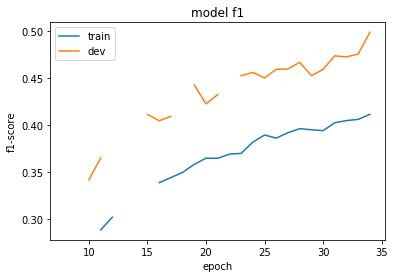

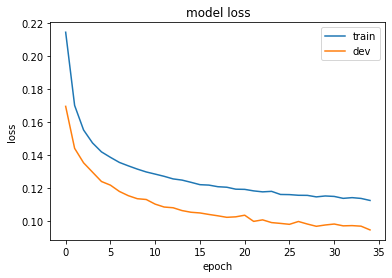

In [4]:
from app.visualization import plot_history_metrics
%matplotlib inline
plot_history_metrics(history2)

## Evaluate performance of centroids MLP model

In [10]:
score2 = model2.evaluate(model2_data['x_test'], model2_data['y_test'], batch_size=32, verbose=1)
print('\nTest Binary_cross_entropy: %.4f' %  (score2[0]))
print('\nTest precision: %.4f' %  (score2[1]))
print('\nTest recall: %.4f' %  (score2[2]))
print('\nTest f1: %.4f' % (score2[3]))
print('\nTest accuracy: %.4f'% (score2[4]))

12000/12000 [==============================] - 0s 33us/step

Test Binary_cross_entropy: 0.0958

Test precision: 0.8520

Test recall: 0.3344

Test f1: 0.4758

Test accuracy: 0.9638


## Visualize Prediction Perfomance of centroids MLP model

--------------------------------------------------------------------------------
Accuracy Score: 58.80%
--------------------------------------------------------------------------------
Confusion Matrix:

               predicted_sql  predicted_ruby-on-rails  predicted_android  \
sql                      297                        8                  5   
ruby-on-rails              5                      306                  4   
android                    2                        8                399   
angularjs                 42                        8                  5   
asp.net                    5                        0                  0   
c                         42                       12                  4   
c#                        21                        2                  0   
c++                        0                        4                  4   
css                        2                        2                  7   
html                       4        

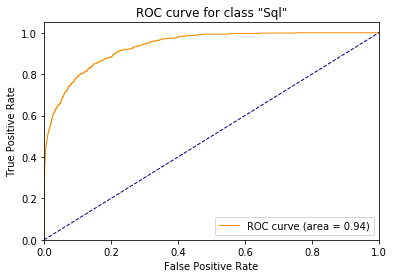

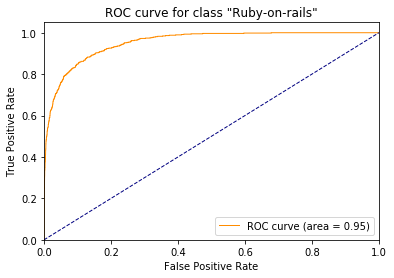

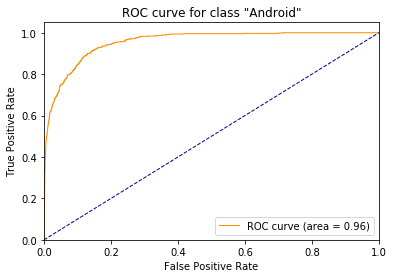

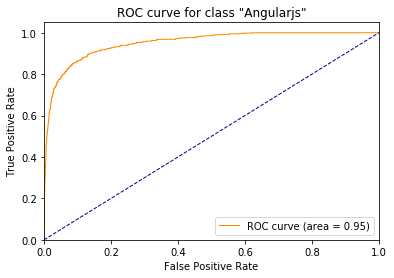

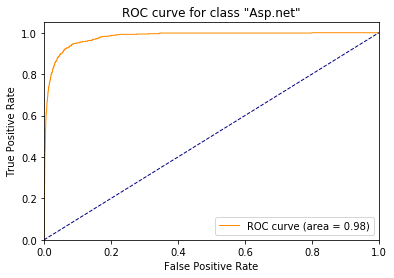

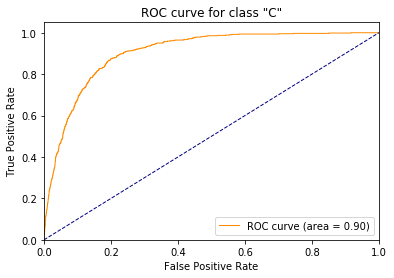

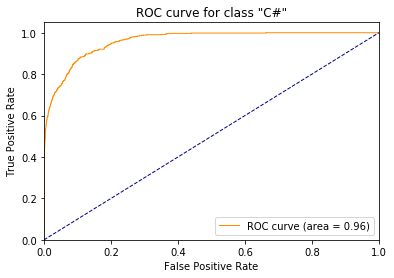

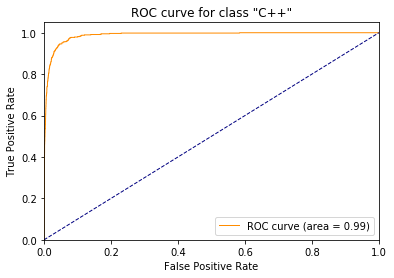

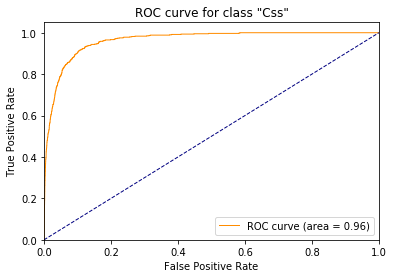

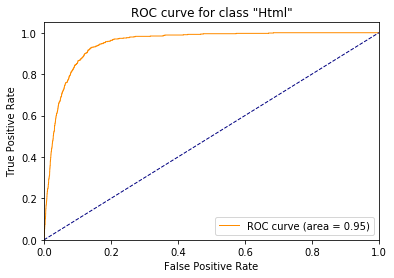

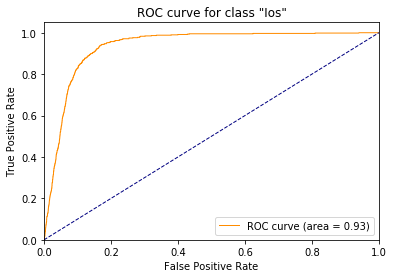

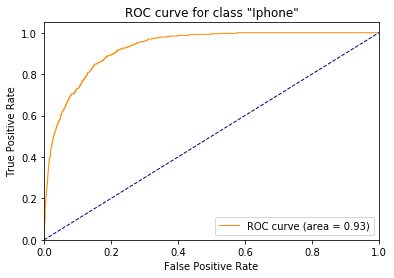

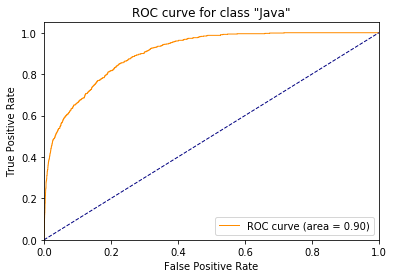

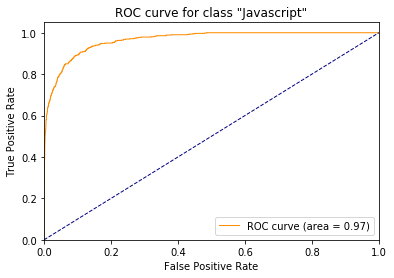

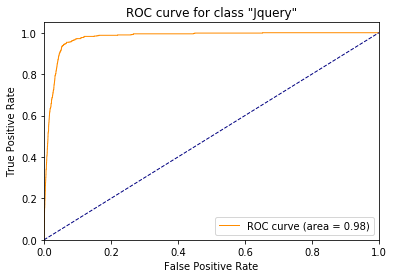

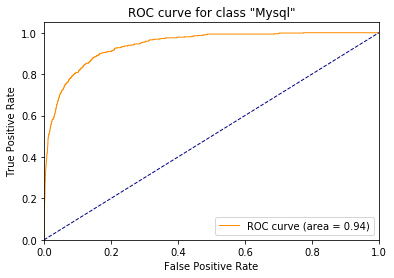

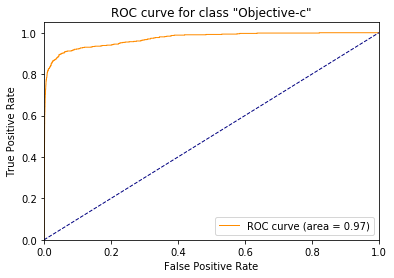

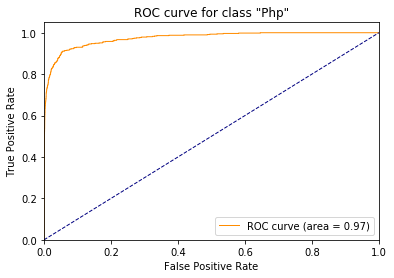

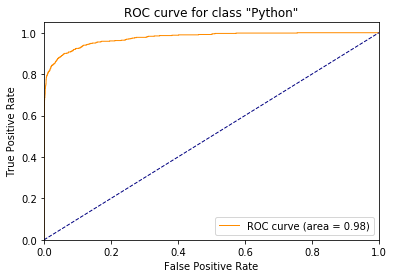

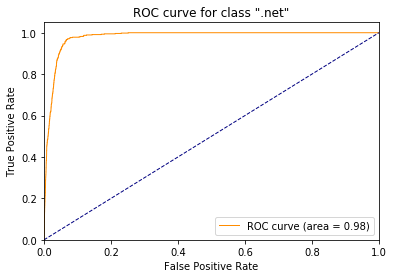

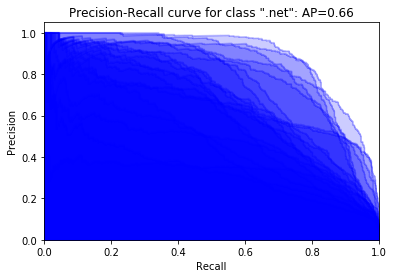

In [13]:
import numpy as np
from app.visualization import plot_prediction_metrics, create_clf_report, plot_roc_curve, plot_precision_recall_curve
prediction_val_2 = model2.predict(model2_data['x_test'], batch_size=32)

# returns each entry result to the classification with the relevant probabilities
y_pred_2_processed = np.array([np.argmax(val) for val in prediction_val_2])
y_true_2_processed = np.array([np.argmax(val) for val in model2_data['y_test']])

create_clf_report(y_true_2_processed, y_pred_2_processed, Classes)

plot_roc_curve(model2_data['y_test'], prediction_val_2, Classes, 1)

plot_precision_recall_curve(model2_data['y_test'], prediction_val_2, Classes , 1)
